# importing dataset

In [1]:
import pandas as pd
main=pd.read_csv('C:/Users/acer/Desktop/python/Attrition Case Study.csv')

dividing into traning and testing set

In [2]:
A=pd.read_csv('C:/Users/acer/Desktop/python/training_set.csv')
B=pd.read_csv('C:/Users/acer/Desktop/python/testing_set.csv')

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
A.isna().sum().plot(kind="barh")

In [6]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Missing data treatment for contimous variable

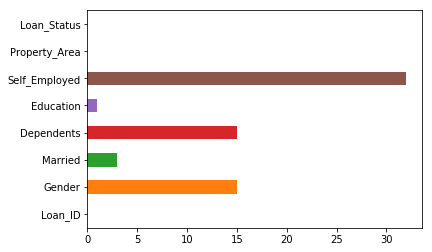

In [7]:
A[cat].isna().sum().plot(kind='barh')

In [8]:
from sklearn.preprocessing import Imputer
imp = Imputer()
A1 = pd.DataFrame(imp.fit_transform(A[con]),columns=con)

# Missing data treatment for Categorical Variables

In [9]:
from sklearn_pandas import CategoricalImputer
ci = CategoricalImputer()
cat.remove("Loan_ID")
A2 = A[cat].apply(ci.fit_transform)

In [10]:
A = A1.join(A2) #Missing data is now treated

# Check eligibility of the Customer given the inputs described above.

In [11]:
Y = A[["Loan_Status"]]

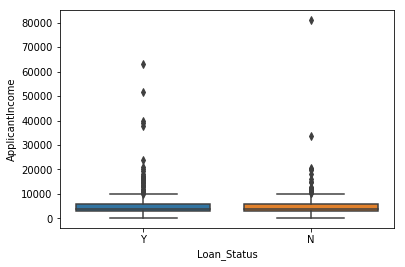

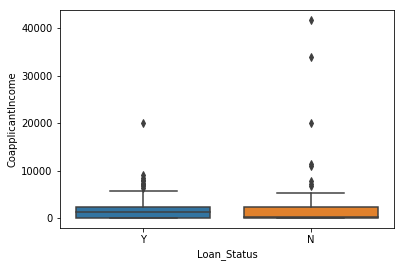

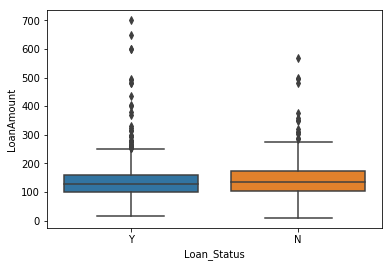

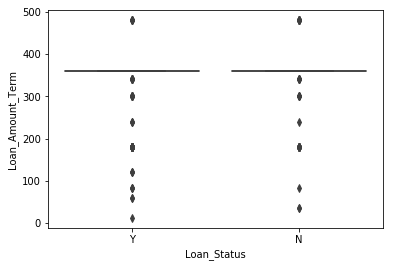

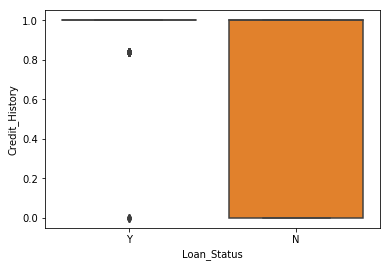

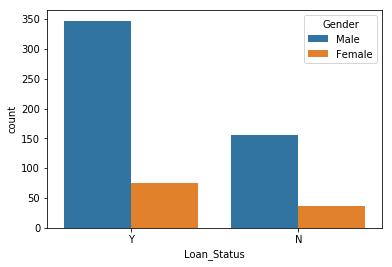

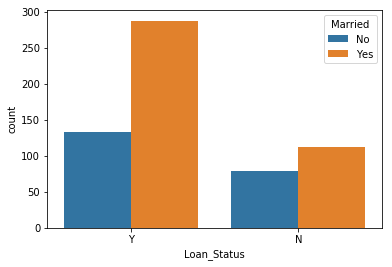

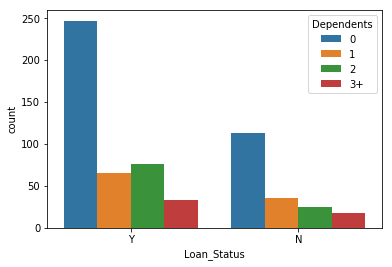

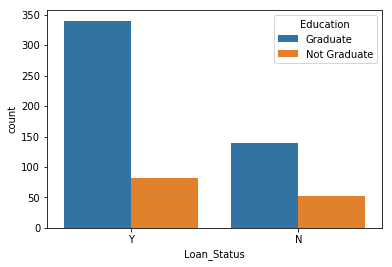

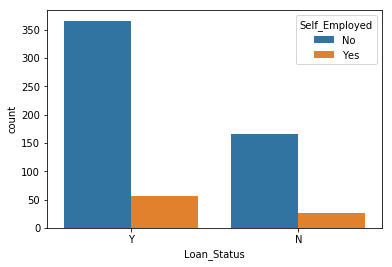

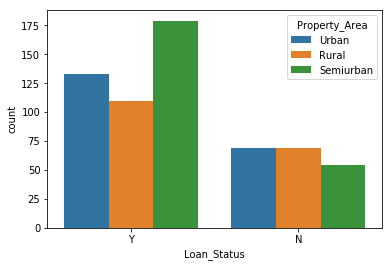

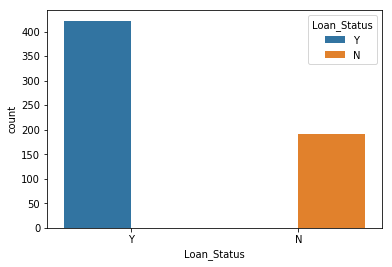

In [12]:
import seaborn as sb
from matplotlib.pyplot import show
for i in A.columns:
    if(A[i].dtypes=="object"):
        sb.countplot(A['Loan_Status'],hue=A[i])
        show()
    else:
        sb.boxplot(A['Loan_Status'],A[i])
        show()

In [13]:
A.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
xtrain = A.drop(labels=["Loan_Status"],axis=1)

ytrain = A[["Loan_Status"]]

In [15]:
xtest = B.drop(labels=["Loan_ID"],axis=1)
#ytest = B[["Loan_Status"]]

In [16]:
X = A.drop(labels=["Loan_Status"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
Y = A[["Loan_Status"]]

In [17]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(xtrain1,ytrain1)
pred = model.predict(xtest1)
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7723577235772358

In [18]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
model = dtc.fit(xtrain1,ytrain1)
pred = model.predict(xtest1)
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,pred)

0.7804878048780488

In [19]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X,Y,test_size=0.2,random_state=30)

from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(max_depth=3,random_state=30)
model = dtc.fit(xtrain1,ytrain1)
pred = model.predict(xtest1)
from sklearn.metrics import accuracy_score
print("%.3f"%accuracy_score(ytest1,pred))

0.789


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# Identify customer segments from given data and categorize customer into one of the segments.


In [20]:
C = A[["ApplicantIncome","LoanAmount","CoapplicantIncome"]]
C['tot_income'] = C.ApplicantIncome + C.CoapplicantIncome

C = C[["LoanAmount","tot_income"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
from sklearn.cluster import KMeans
WCSS = []
k = range(2,10,1)
for i in range(2,10,1):
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    WCSS.append(model.inertia_)

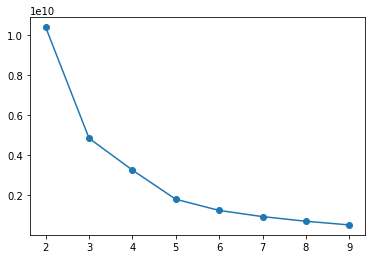

In [22]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS)
plt.plot(k,WCSS)

In [23]:
km = KMeans(n_clusters=5)
model = km.fit(C)
C['cluster_label']=model.labels_


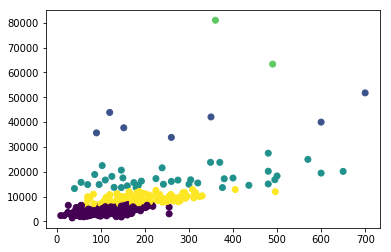

In [24]:
plt.scatter(C.LoanAmount,C.tot_income,c=C['cluster_label'])